In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [3]:
path = '../raw_data/building/csv_building_ownership_and_use.csv'
df_owner = pd.read_csv(path)

values_path = '../raw_data/building/csv_building_structure.csv'
df_building = pd.read_csv(values_path)

# Merging dataframes

In [4]:
df_building.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [5]:
df_building_1 = ['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'damage_grade']

In [6]:
drop = []
for i in df_building.columns:
    if i not in df_building_1:
        drop.append(i)
        
drop

['count_floors_post_eq',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'condition_post_eq',
 'technical_solution_proposed']

In [7]:
df_building = df_building.drop(drop, axis=1)

In [8]:
df_building.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'age_building', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'damage_grade'],
      dtype='object')

In [9]:
df_owner.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'],
      dtype='object')

In [10]:
df_owner_1 = ['building_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [11]:
df_owner_drop = []
for i in df_owner.columns:
    if i not in df_owner_1:
        df_owner_drop.append(i)
        
df_owner_drop

['district_id', 'vdcmun_id', 'ward_id']

In [12]:
df_owner = df_owner.drop(df_owner_drop, axis=1)

In [13]:
building_ownership = pd.merge(df_building, df_owner, on='building_id', how='inner')

In [14]:
building_ownership.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,age_building,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,9,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,15,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,20,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,20,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,30,Flat,Other,Bamboo/Timber-Light roof,Mud,...,0,0,0,0,0,0,0,0,0,0


# Starting to analyse
### has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.

### has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.

### has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.

### has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.

### has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.

### has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.

### has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.

### has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.

### has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.

### has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.

### has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



In [15]:
cols = building_ownership.loc[:,'has_secondary_use':'has_secondary_use_other'].columns


In [16]:
df[cols].sum().plot.bar()


NameError: name 'df' is not defined

<AxesSubplot:>

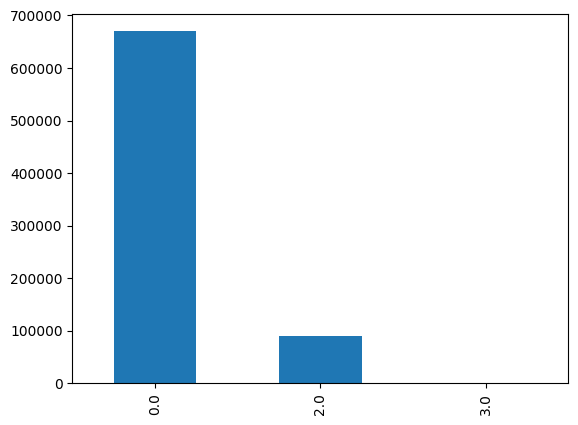

In [ ]:
df[cols].T.sum().value_counts().plot.bar()


In [ ]:
building_ownership[building_ownership['has_secondary_use'] ==1][cols].T.sum().value_counts()


2.0    91018
3.0     1346
dtype: int64

In [ ]:
building_ownership[cols].T.sum().value_counts()


0.0    669742
2.0     91018
3.0      1346
dtype: int64

In [ ]:
heatmap_df = building_ownership[["damage_grade", "land_surface_condition"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['land_surface_condition','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,land_surface_condition,damage_grade,values
0,Flat,Grade 1,68849
1,Flat,Grade 2,73166
2,Flat,Grade 3,111244
3,Flat,Grade 4,148615
4,Flat,Grade 5,229789
5,Moderate slope,Grade 1,8063
6,Moderate slope,Grade 2,11813
7,Moderate slope,Grade 3,20624
8,Moderate slope,Grade 4,28694
9,Moderate slope,Grade 5,36446


In [ ]:
heatmap_df = heatmap_df.pivot(index=['land_surface_condition'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade           Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
land_surface_condition                                        
Flat                     68849   73166  111244  148615  229789
Moderate slope            8063   11813   20624   28694   36446
Steep slope               1903    2278    4544    6535    9531

In [ ]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

NameError: name 'sns' is not defined

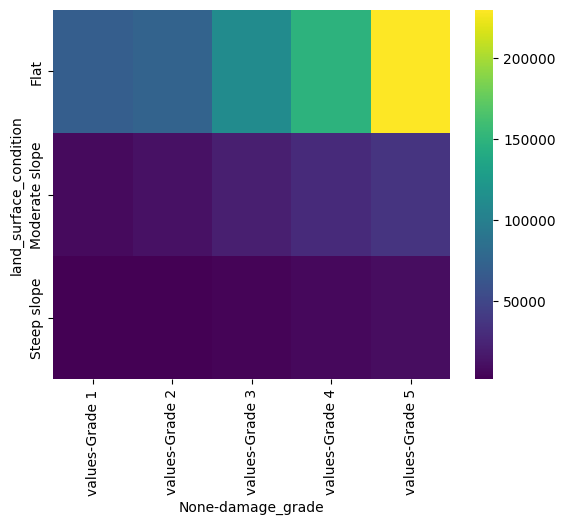

In [ ]:
sns.heatmap(heatmap_df, cmap='viridis');

In [ ]:
expected_value = pd.DataFrame(index=cols, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i, "expected_value_damage"] = building_ownership[building_ownership[i] == 1]['damage_grade'].mean()
    expected_value.loc[i, "frequency"] = len(building_ownership[building_ownership[i] == 1])/len(building_ownership) * 100
expected_value.sort_values(by="expected_value_damage")

TypeError: Could not convert Grade 1Grade 4Grade 1Grade 1Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 3Grade 1Grade 5Grade 1Grade 3Grade 3Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 4Grade 3Grade 1Grade 1Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 5Grade 2Grade 3Grade 3Grade 5Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 3Grade 2Grade 3Grade 2Grade 1Grade 4Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 5Grade 5Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 5Grade 5Grade 4Grade 1Grade 2Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 1Grade 5Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 1Grade 1Grade 2Grade 3Grade 4Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 4Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 4Grade 1Grade 5Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 3Grade 4Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 5Grade 2Grade 1Grade 4Grade 1Grade 2Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 2Grade 4Grade 3Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 5Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 2Grade 2Grade 3Grade 5Grade 5Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 4Grade 4Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 3Grade 2Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 1Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 1Grade 1Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 4Grade 2Grade 1Grade 3Grade 1Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 2Grade 3Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 1Grade 2Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 1Grade 5Grade 1Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 2Grade 1Grade 2Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 2Grade 2Grade 3Grade 5Grade 2Grade 4Grade 5Grade 4Grade 5Grade 2Grade 2Grade 5Grade 3Grade 1Grade 1Grade 4Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 2Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 1Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 1Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 5Grade 5Grade 3Grade 1Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 5Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 5Grade 5Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 5Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 5Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 4Grade 3Grade 5Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 2Grade 3Grade 5Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 3Grade 4Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 5Grade 3Grade 3Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 3Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 4Grade 1Grade 4Grade 4Grade 2Grade 1Grade 3Grade 1Grade 4Grade 1Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 4Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 1Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 5Grade 4Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 5Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 5Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 5Grade 2Grade 4Grade 3Grade 4Grade 1Grade 4Grade 2Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 4Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 1Grade 3Grade 1Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 4Grade 4Grade 1Grade 2Grade 2Grade 5Grade 1Grade 2Grade 4Grade 4Grade 4Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 5Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 3Grade 3Grade 5Grade 1Grade 1Grade 2Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 4Grade 1Grade 2Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 5Grade 2Grade 2Grade 1Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 1Grade 4Grade 2Grade 2Grade 5Grade 4Grade 4Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 1Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 5Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 2Grade 3Grade 1Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 4Grade 5Grade 1Grade 3Grade 1Grade 1Grade 4Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 5Grade 1Grade 1Grade 1Grade 4Grade 3Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 1Grade 3Grade 1Grade 3Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 5Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 5Grade 3Grade 1Grade 4Grade 1Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 1Grade 1Grade 4Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 2Grade 1Grade 2Grade 5Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 5Grade 5Grade 2Grade 4Grade 1Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 1Grade 5Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 1Grade 1Grade 3Grade 4Grade 4Grade 1Grade 4Grade 2Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 1Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 5Grade 3Grade 4Grade 1Grade 3Grade 1Grade 3Grade 3Grade 5Grade 2Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 5Grade 1Grade 5Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 4Grade 1Grade 4Grade 1Grade 1Grade 4Grade 1Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 5Grade 3Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 5Grade 1Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 5Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 2Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 1Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 1Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 1Grade 2Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 1Grade 5Grade 4Grade 5Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 4Grade 1Grade 1Grade 4Grade 5Grade 3Grade 1Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 4Grade 1Grade 3Grade 5Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 1Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 3Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 5Grade 5Grade 5Grade 2Grade 4Grade 2Grade 4Grade 2Grade 3Grade 2Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 5Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 1Grade 3Grade 1Grade 2Grade 4Grade 1Grade 2Grade 1Grade 3Grade 1Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 3Grade 1Grade 4Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 4Grade 5Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 5Grade 1Grade 3Grade 2Grade 1Grade 3Grade 5Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 4Grade 2Grade 2Grade 5Grade 2Grade 3Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 2Grade 4Grade 1Grade 2Grade 4Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 5Grade 1Grade 2Grade 1Grade 2Grade 5Grade 2Grade 5Grade 3Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 4Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 1Grade 1Grade 3Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 4Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 4Grade 1Grade 2Grade 4Grade 5Grade 5Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 5Grade 3Grade 5Grade 4Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 5Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 3Grade 1Grade 4Grade 5Grade 3Grade 5Grade 1Grade 5Grade 4Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 1Grade 2Grade 1Grade 4Grade 3Grade 4Grade 2Grade 1Grade 1Grade 5Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 4Grade 1Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 4Grade 1Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 1Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 5Grade 2Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 4Grade 1Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 1Grade 1Grade 3Grade 2Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 1Grade 4Grade 3Grade 2Grade 1Grade 2Grade 4Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 4Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 4Grade 4Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 4Grade 3Grade 1Grade 4Grade 2Grade 3Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 5Grade 2Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 3Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 3Grade 1Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 2Grade 2Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 1Grade 1Grade 4Grade 3Grade 2Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 4Grade 4Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 1Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 3Grade 4Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 4Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 1Grade 3Grade 1Grade 4Grade 3Grade 1Grade 4Grade 4Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 4Grade 3Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 3Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 4Grade 1Grade 1Grade 2Grade 5Grade 1Grade 3Grade 3Grade 1Grade 4Grade 4Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 4Grade 2Grade 5Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 5Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 2Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 1Grade 4Grade 2Grade 1Grade 3Grade 1Grade 3Grade 3Grade 5Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 5Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 1Grade 1Grade 2Grade 2Grade 1Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 4Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 3Grade 1Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 2Grade 2Grade 1Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 2Grade 4Grade 5Grade 4Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 5Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 5Grade 3Grade 3Grade 4Grade 1Grade 1Grade 5Grade 2Grade 1Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 5Grade 5Grade 2Grade 3Grade 1Grade 2Grade 5Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 5Grade 1Grade 3Grade 4Grade 5Grade 4Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 4Grade 1Grade 4Grade 1Grade 4Grade 1Grade 3Grade 2Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 4Grade 3Grade 4Grade 2Grade 1Grade 1Grade 3Grade 5Grade 1Grade 5Grade 1Grade 4Grade 1Grade 5Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 2Grade 1Grade 5Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 5Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 1Grade 3Grade 3Grade 4Grade 3Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 2Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 5Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 5Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 2Grade 5Grade 5Grade 3Grade 2Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 1Grade 4Grade 2Grade 2Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 3Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 1Grade 4Grade 2Grade 2Grade 1Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 1Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 5Grade 4Grade 1Grade 1Grade 1Grade 5Grade 2Grade 5Grade 1Grade 5Grade 2Grade 5Grade 1Grade 2Grade 1Grade 5Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 4Grade 1Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 2Grade 1Grade 1Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 2Grade 4Grade 2Grade 4Grade 1Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 3Grade 4Grade 5Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 5Grade 4Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 3Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 5Grade 5Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 5Grade 4Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 1Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 2Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 2Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 2Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 1Grade 4Grade 1Grade 4Grade 3Grade 1Grade 1Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 2Grade 5Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 2Grade 4Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 4Grade 3Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 4Grade 2Grade 1Grade 5Grade 2Grade 4Grade 1Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 3Grade 5Grade 4Grade 2Grade 4Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 1Grade 3Grade 3Grade 1Grade 1Grade 4Grade 3Grade 2Grade 4Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 1Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 5Grade 3Grade 5Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 4Grade 1Grade 4Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 1Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 1Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 1Grade 2Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 4Grade 2Grade 1Grade 5Grade 2Grade 4Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 4Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 1Grade 4Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 4Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 5Grade 1Grade 1Grade 3Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 1Grade 2Grade 5Grade 3Grade 1Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 4Grade 1Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 3Grade 1Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 1Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 5Grade 3Grade 5Grade 1Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 1Grade 4Grade 3Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 2Grade 5Grade 2Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 1Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 1Grade 1Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 1Grade 4Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 4Grade 4Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 1Grade 2Grade 4Grade 1Grade 4Grade 5Grade 4Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 5Grade 4Grade 1Grade 5Grade 4Grade 2Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 1Grade 5Grade 4Grade 2Grade 3Grade 1Grade 1Grade 4Grade 5Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 3Grade 4Grade 1Grade 4Grade 5Grade 4Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 1Grade 3Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 2Grade 3Grade 4Grade 5Grade 3Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 5Grade 3Grade 2Grade 5Grade 2Grade 3Grade 1Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 2Grade 4Grade 1Grade 3Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 4Grade 1Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 5Grade 3Grade 2Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 5Grade 1Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 3Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 1Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 3Grade 2Grade 2Grade 4Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 2Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 2Grade 4Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 1Grade 4Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 4Grade 1Grade 5Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 1Grade 5Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 5Grade 1Grade 3Grade 2Grade 3Grade 1Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 5Grade 5Grade 5Grade 2Grade 4Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 5Grade 3Grade 2Grade 1Grade 4Grade 4Grade 3Grade 2Grade 1Grade 3Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 5Grade 3Grade 4Grade 2Grade 3Grade 2Grade 5Grade 1Grade 4Grade 2Grade 3Grade 3Grade 1Grade 3Grade 4Grade 2Grade 5Grade 4Grade 3Grade 2Grade 5Grade 4Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 2Grade 3Grade 4Grade 5Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 1Grade 4Grade 1Grade 5Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 5Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 5Grade 3Grade 4Grade 5Grade 1Grade 5Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 1Grade 2Grade 1Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 2Grade 5Grade 5Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 5Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 1Grade 3Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 5Grade 2Grade 2Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 1Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 4Grade 2Grade 5Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 2Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 4Grade 1Grade 4Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 2Grade 4Grade 5Grade 3Grade 5Grade 2Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 5Grade 4Grade 3Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 1Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 1Grade 1Grade 3Grade 1Grade 3Grade 5Grade 4Grade 3Grade 5Grade 1Grade 4Grade 3Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 5Grade 4Grade 1Grade 4Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 4Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 4Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 5Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 4Grade 3Grade 2Grade 1Grade 2Grade 1Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 1Grade 3Grade 5Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 1Grade 1Grade 4Grade 3Grade 1Grade 4Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 2Grade 1Grade 3Grade 1Grade 5Grade 3Grade 2Grade 5Grade 3Grade 1Grade 4Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 5Grade 2Grade 4Grade 1Grade 5Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 1Grade 5Grade 1Grade 5Grade 5Grade 1Grade 2Grade 1Grade 5Grade 5Grade 1Grade 3Grade 3Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 1Grade 3Grade 4Grade 1Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 5Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 4Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 2Grade 1Grade 4Grade 2Grade 3Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 1Grade 4Grade 5Grade 5Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 1Grade 1Grade 2Grade 5Grade 4Grade 3Grade 5Grade 5Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 1Grade 5Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 4Grade 1Grade 1Grade 4Grade 1Grade 2Grade 3Grade 4Grade 1Grade 3Grade 4Grade 3Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 1Grade 3Grade 5Grade 1Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 2Grade 1Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 1Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 3Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 5Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 2Grade 3Grade 5Grade 4Grade 2Grade 1Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 4Grade 1Grade 2Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 2Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 2Grade 5Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 1Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 1Grade 5Grade 2Grade 2Grade 4Grade 1Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 1Grade 1Grade 5Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 1Grade 1Grade 5Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 5Grade 4Grade 2Grade 2Grade 5Grade 4Grade 5Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 4Grade 2Grade 2Grade 5Grade 3Grade 1Grade 4Grade 3Grade 1Grade 1Grade 2Grade 4Grade 5Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 5Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 5Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 1Grade 1Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 3Grade 4Grade 4Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 4Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 1Grade 3Grade 3Grade 5Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 3Grade 2Grade 3Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 2Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 4Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 1Grade 4Grade 1Grade 5Grade 3Grade 1Grade 4Grade 1Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 1Grade 4Grade 3Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 1Grade 4Grade 3Grade 1Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 5Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 2Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 1Grade 2Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 1Grade 2Grade 4Grade 1Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 1Grade 2Grade 4Grade 3Grade 4Grade 4Grade 1Grade 4Grade 2Grade 3Grade 3Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 2Grade 1Grade 2Grade 2Grade 5Grade 2Grade 3Grade 3Grade 1Grade 4Grade 5Grade 4Grade 4Grade 2Grade 1Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 2Grade 3Grade 4Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 5Grade 1Grade 5Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 1Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 1Grade 4Grade 2Grade 3Grade 4Grade 5Grade 2Grade 5Grade 5Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 4Grade 2Grade 1Grade 3Grade 2Grade 5Grade 5Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 1Grade 2Grade 1Grade 2Grade 5Grade 3Grade 2Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 5Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 4Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 5Grade 2Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 5Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 5Grade 2Grade 2Grade 5Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 3Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 5Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 3Grade 1Grade 4Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 4Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 1Grade 1Grade 5Grade 5Grade 1Grade 2Grade 5Grade 1Grade 1Grade 4Grade 3Grade 2Grade 1Grade 3Grade 3Grade 5Grade 5Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 5Grade 1Grade 4Grade 1Grade 5Grade 5Grade 1Grade 5Grade 3Grade 3Grade 5Grade 4Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 4Grade 1Grade 2Grade 1Grade 5Grade 5Grade 1Grade 4Grade 1Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 2Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 1Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 3Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 1Grade 5Grade 4Grade 4Grade 2Grade 2Grade 4Grade 5Grade 2Grade 4Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 2Grade 4Grade 5Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 2Grade 1Grade 4Grade 1Grade 4Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 1Grade 3Grade 1Grade 4Grade 5Grade 4Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 5Grade 2Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 5Grade 2Grade 1Grade 5Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 4Grade 3Grade 4Grade 1Grade 5Grade 3Grade 2Grade 5Grade 4Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 4Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 5Grade 5Grade 3Grade 5Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 2Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 1Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 2Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 2Grade 4Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 2Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 1Grade 2Grade 4Grade 3Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 4Grade 1Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 4Grade 5Grade 1Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 5Grade 2Grade 1Grade 5Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 2Grade 4Grade 1Grade 4Grade 2Grade 2Grade 1Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 4Grade 4Grade 3Grade 5Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 5Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 2Grade 4Grade 5Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 4Grade 2Grade 4Grade 2Grade 2Grade 4Grade 3Grade 2Grade 5Grade 5Grade 3Grade 2Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 4Grade 1Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 2Grade 4Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 1Grade 3Grade 1Grade 1Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 1Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 1Grade 2Grade 4Grade 5Grade 1Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 5Grade 5Grade 3Grade 2Grade 2Grade 5Grade 1Grade 5Grade 1Grade 1Grade 4Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 1Grade 2Grade 2Grade 1Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 4Grade 1Grade 3Grade 1Grade 3Grade 5Grade 4Grade 5Grade 4Grade 1Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 2Grade 5Grade 4Grade 1Grade 5Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 5Grade 3Grade 3Grade 2Grade 1Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 1Grade 2Grade 2Grade 3Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 2Grade 5Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 1Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 1Grade 3Grade 2Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 2Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 3Grade 2Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 5Grade 1Grade 2Grade 2Grade 5Grade 2Grade 5Grade 4Grade 5Grade 1Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 2Grade 4Grade 5Grade 4Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 1Grade 4Grade 4Grade 2Grade 5Grade 4Grade 2Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 4Grade 2Grade 2Grade 1Grade 2Grade 5Grade 3Grade 2Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 5Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 1Grade 4Grade 4Grade 4Grade 3Grade 1Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 3Grade 4Grade 2Grade 4Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 2Grade 5Grade 2Grade 3Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 1Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 2Grade 2Grade 5Grade 3Grade 1Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 2Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 1Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 5Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 2Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 1Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 1Grade 2Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 5Grade 1Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 2Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 4Grade 5Grade 5Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 4Grade 2Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 2Grade 4Grade 3Grade 1Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 1Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 3Grade 5Grade 1Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 1Grade 5Grade 1Grade 4Grade 2Grade 4Grade 1Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 2Grade 5Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 2Grade 2Grade 3Grade 2Grade 5Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 1Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 3Grade 3Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 2Grade 2Grade 5Grade 4Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 5Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 1Grade 3Grade 2Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 3Grade 1Grade 1Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 1Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 1Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 1Grade 1Grade 5Grade 1Grade 5Grade 3Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 1Grade 2Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 2Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 2Grade 3Grade 5Grade 1Grade 4Grade 5Grade 1Grade 3Grade 3Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 5Grade 5Grade 5Grade 2Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 2Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 2Grade 5Grade 2Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 3Grade 2Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 1Grade 1Grade 2Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 5Grade 4Grade 2Grade 3Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 5Grade 1Grade 1Grade 1Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 2Grade 1Grade 3Grade 4Grade 5Grade 5Grade 3Grade 1Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 4Grade 5Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 5Grade 5Grade 1Grade 1Grade 4Grade 3Grade 3Grade 4Grade 4Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 2Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 4Grade 5Grade 5Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 4Grade 1Grade 5Grade 2Grade 3Grade 2Grade 5Grade 1Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 5Grade 3Grade 4Grade 5Grade 2Grade 5Grade 2Grade 1Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 2Grade 2Grade 5Grade 5Grade 5Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 5Grade 5Grade 2Grade 1Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 5Grade 4Grade 5Grade 1Grade 5Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 2Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 2Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 4Grade 4Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 5Grade 3Grade 1Grade 5Grade 4Grade 2Grade 2Grade 2Grade 1Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 1Grade 5Grade 1Grade 4Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 1Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 1Grade 2Grade 4Grade 1Grade 2Grade 2Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 1Grade 1Grade 5Grade 1Grade 2Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 1Grade 3Grade 5Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 4Grade 5Grade 3Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 1Grade 1Grade 1Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 1Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 2Grade 3Grade 2Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 2Grade 1Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 1Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 2Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 3Grade 2Grade 2Grade 1Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 1Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 4Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 5Grade 5Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 2Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 4Grade 2Grade 5Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 2Grade 5Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 2Grade 4Grade 5Grade 2Grade 5Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 4Grade 5Grade 4Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 1Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 2Grade 2Grade 4Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 2Grade 5Grade 2Grade 5Grade 2Grade 3Grade 5Grade 1Grade 3Grade 1Grade 1Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 2Grade 3Grade 2Grade 1Grade 4Grade 2Grade 5Grade 1Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 1Grade 4Grade 3Grade 4Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 1Grade 1Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 5Grade 4Grade 5Grade 5Grade 2Grade 3Grade 1Grade 5Grade 3Grade 5Grade 5Grade 1Grade 4Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 4Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 2Grade 2Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 2Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 2Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 1Grade 2Grade 5Grade 1Grade 3Grade 2Grade 5Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 4Grade 1Grade 1Grade 3Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 2Grade 5Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 5Grade 5Grade 1Grade 3Grade 2Grade 2Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 4Grade 1Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 5Grade 5Grade 5Grade 2Grade 2Grade 1Grade 1Grade 1Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 2Grade 1Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 2Grade 1Grade 1Grade 2Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 1Grade 1Grade 5Grade 5Grade 3Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 3Grade 1Grade 5Grade 1Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 3Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 4Grade 3Grade 3Grade 1Grade 5Grade 3Grade 5Grade 5Grade 2Grade 1Grade 5Grade 1Grade 5Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 5Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 5Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 1Grade 3Grade 4Grade 2Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 2Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 1Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 1Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 3Grade 3Grade 2Grade 5Grade 5Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 2Grade 5Grade 4Grade 2Grade 1Grade 1Grade 5Grade 5Grade 4Grade 2Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 1Grade 5Grade 3Grade 1Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 3Grade 5Grade 2Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 4Grade 4Grade 3Grade 5Grade 2Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 2Grade 1Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 1Grade 4Grade 4Grade 3Grade 5Grade 5Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 5Grade 2Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 1Grade 1Grade 2Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 2Grade 4Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 2Grade 2Grade 2Grade 5Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 2Grade 2Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 5Grade 5Grade 5Grade 3Grade 5Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 5Grade 3Grade 3Grade 4Grade 2Grade 2Grade 1Grade 4Grade 5Grade 5Grade 2Grade 3Grade 2Grade 1Grade 4Grade 2Grade 2Grade 5Grade 5Grade 1Grade 4Grade 5Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 1Grade 3Grade 1Grade 1Grade 5Grade 3Grade 1Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 5Grade 2Grade 2Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 2Grade 4Grade 3Grade 2Grade 4Grade 3Grade 1Grade 1Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 4Grade 1Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 1Grade 3Grade 3Grade 4Grade 4Grade 1Grade 5Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 2Grade 5Grade 4Grade 2Grade 2Grade 3Grade 4Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 1Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 4Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 3Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 3Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 1Grade 3Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 2Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 3Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 5Grade 3Grade 4Grade 4Grade 5Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 1Grade 4Grade 5Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 5Grade 1Grade 5Grade 4Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 2Grade 2Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 2Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 1Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 4Grade 5Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 5Grade 2Grade 4Grade 4Grade 2Grade 4Grade 1Grade 4Grade 4Grade 3Grade 2Grade 5Grade 3Grade 3Grade 4Grade 2Grade 2Grade 5Grade 1Grade 3Grade 4Grade 1Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 1Grade 2Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 5Grade 5Grade 2Grade 1Grade 4Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 3Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 1Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 1Grade 5Grade 4Grade 3Grade 1Grade 1Grade 3Grade 4Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 1Grade 5Grade 4Grade 5Grade 5Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 5Grade 5Grade 2Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 2Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 5Grade 5Grade 4Grade 1Grade 3Grade 4Grade 4Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 1Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 5Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 2Grade 4Grade 3Grade 5Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 5Grade 1Grade 4Grade 4Grade 2Grade 4Grade 5Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 4Grade 2Grade 4Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 5Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 2Grade 5Grade 3Grade 2Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 5Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 4Grade 2Grade 5Grade 5Grade 2Grade 5Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 3Grade 4Grade 2Grade 2Grade 3Grade 4Grade 4Grade 2Grade 2Grade 5Grade 5Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 2Grade 1Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 5Grade 3Grade 2Grade 1Grade 3Grade 2Grade 2Grade 4Grade 3Grade 5Grade 3Grade 3Grade 2Grade 5Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 5Grade 5Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 5Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 2Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 4Grade 2Grade 5Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 1Grade 4Grade 3Grade 2Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 2Grade 5Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 2Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 1Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 5Grade 5Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 1Grade 1Grade 5Grade 1Grade 5Grade 5Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 5Grade 4Grade 4Grade 2Grade 1Grade 5Grade 1Grade 4Grade 5Grade 4Grade 3Grade 5Grade 1Grade 4Grade 1Grade 1Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 1Grade 5Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 4Grade 2Grade 2Grade 3Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 4Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 4Grade 4Grade 4Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 1Grade 2Grade 3Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 5Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 3Grade 1Grade 3Grade 2Grade 5Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 4Grade 2Grade 1Grade 1Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 2Grade 1Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 1Grade 2Grade 1Grade 2Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 1Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 4Grade 1Grade 4Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 4Grade 1Grade 4Grade 1Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 4Grade 4Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 4Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 1Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 4Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 5Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 4Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 4Grade 2Grade 4Grade 4Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 2Grade 2Grade 3Grade 3Grade 1Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 5Grade 1Grade 2Grade 2Grade 2Grade 1Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 5Grade 2Grade 5Grade 1Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 5Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 2Grade 4Grade 3Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 5Grade 3Grade 1Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 2Grade 2Grade 4Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 5Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 1Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 2Grade 1Grade 5Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 2Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 1Grade 2Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 1Grade 2Grade 2Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 1Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 2Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 1Grade 5Grade 3Grade 1Grade 5Grade 5Grade 3Grade 3Grade 3Grade 1Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 1Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 1Grade 3Grade 2Grade 2Grade 5Grade 4Grade 2Grade 4Grade 2Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 3Grade 2Grade 4Grade 5Grade 3Grade 4Grade 3Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 5Grade 5Grade 2Grade 1Grade 1Grade 5Grade 2Grade 2Grade 5Grade 3Grade 3Grade 1Grade 1Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 1Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 2Grade 3Grade 3Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 1Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 1Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 4Grade 2Grade 4Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 3Grade 4Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 2Grade 4Grade 2Grade 1Grade 4Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 5Grade 2Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 4Grade 1Grade 3Grade 4Grade 2Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 2Grade 4Grade 2Grade 2Grade 4Grade 2Grade 4Grade 2Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 2Grade 4Grade 1Grade 3Grade 2Grade 5Grade 4Grade 2Grade 3Grade 2Grade 2Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 1Grade 4Grade 3Grade 2Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 1Grade 3Grade 3Grade 5Grade 3Grade 4Grade 2Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 3Grade 1Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 2Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 2Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 2Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 2Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 4Grade 3Grade 5Grade 2Grade 4Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 2Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 3Grade 2Grade 3Grade 5Grade 3Grade 4Grade 2Grade 2Grade 1Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 2Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 1Grade 5Grade 3Grade 4Grade 3Grade 5Grade 2Grade 4Grade 3Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 4Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 3Grade 2Grade 5Grade 2Grade 2Grade 3Grade 4Grade 5Grade 1Grade 3Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 4Grade 5Grade 2Grade 2Grade 1Grade 3Grade 5Grade 5Grade 3Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 4Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 4Grade 3Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 3Grade 1Grade 3Grade 5Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 5Grade 2Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 1Grade 2Grade 4Grade 2Grade 5Grade 3Grade 2Grade 5Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 1Grade 4Grade 2Grade 1Grade 1Grade 3Grade 1Grade 4Grade 3Grade 3Grade 4Grade 1Grade 4Grade 4Grade 1Grade 1Grade 4Grade 3Grade 1Grade 4Grade 4Grade 1Grade 1Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 2Grade 1Grade 2Grade 2Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 1Grade 2Grade 5Grade 5Grade 3Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 5Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 1Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 1Grade 3Grade 3Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 2Grade 5Grade 3Grade 2Grade 5Grade 5Grade 2Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 4Grade 3Grade 5Grade 3Grade 2Grade 3Grade 4Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 3Grade 1Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 4Grade 4Grade 2Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 2Grade 3Grade 2Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 2Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 1Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 1Grade 1Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 4Grade 5Grade 2Grade 2Grade 3Grade 5Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 4Grade 3Grade 5Grade 2Grade 5Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 5Grade 5Grade 2Grade 2Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 2Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 1Grade 1Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 1Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 2Grade 5Grade 2Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 1Grade 4Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 3Grade 4Grade 1Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 1Grade 4Grade 1Grade 3Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 3Grade 2Grade 5Grade 1Grade 2Grade 5Grade 4Grade 2Grade 4Grade 2Grade 5Grade 4Grade 1Grade 3Grade 4Grade 2Grade 4Grade 5Grade 2Grade 5Grade 1Grade 2Grade 4Grade 1Grade 1Grade 4Grade 5Grade 4Grade 4Grade 2Grade 5Grade 2Grade 3Grade 2Grade 5Grade 4Grade 2Grade 2Grade 4Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 5Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 5Grade 2Grade 4Grade 3Grade 4Grade 5Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 5Grade 2Grade 3Grade 5Grade 3Grade 2Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 2Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 5Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 2Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 1Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 1Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 1Grade 2Grade 1Grade 3Grade 5Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 5Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 2Grade 5Grade 3Grade 5Grade 2Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 1Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 2Grade 3Grade 1Grade 3Grade 3Grade 5Grade 2Grade 2Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 2Grade 1Grade 5Grade 5Grade 4Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 5Grade 5Grade 1Grade 5Grade 2Grade 2Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 2Grade 4Grade 5Grade 4Grade 1Grade 5Grade 5Grade 1Grade 4Grade 1Grade 4Grade 1Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 4Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 2Grade 5Grade 3Grade 5Grade 4Grade 2Grade 2Grade 3Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 5Grade 3Grade 1Grade 2Grade 5Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 1Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 5Grade 2Grade 3Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 4Grade 5Grade 3Grade 2Grade 1Grade 1Grade 1Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 5Grade 4Grade 3Grade 4Grade 2Grade 3Grade 5Grade 3Grade 2Grade 1Grade 3Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 3Grade 4Grade 2Grade 5Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 1Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 1Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 4Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 5Grade 4Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 1Grade 1Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 4Grade 3Grade 3Grade 4Grade 3Grade 1Grade 3Grade 3Grade 2Grade 4Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 1Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 5Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 4Grade 1Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 1Grade 4Grade 3Grade 3Grade 1Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 1Grade 3Grade 1Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 5Grade 2Grade 1Grade 1Grade 4Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 1Grade 1Grade 5Grade 5Grade 3Grade 4Grade 1Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 1Grade 5Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 2Grade 1Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 2Grade 5Grade 1Grade 1Grade 5Grade 4Grade 4Grade 2Grade 3Grade 1Grade 5Grade 5Grade 1Grade 4Grade 1Grade 5Grade 5Grade 1Grade 2Grade 2Grade 1Grade 5Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 2Grade 3Grade 1Grade 4Grade 2Grade 3Grade 5Grade 4Grade 5Grade 4Grade 1Grade 2Grade 5Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 1Grade 4Grade 4Grade 3Grade 1Grade 3Grade 4Grade 3Grade 1Grade 4Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 2Grade 5Grade 2Grade 5Grade 5Grade 1Grade 2Grade 1Grade 4Grade 2Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 5Grade 4Grade 2Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 5Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 5Grade 2Grade 5Grade 4Grade 5Grade 3Grade 5Grade 2Grade 2Grade 1Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 1Grade 5Grade 2Grade 3Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 4Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 5Grade 1Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 5Grade 3Grade 3Grade 1Grade 3Grade 4Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 4Grade 2Grade 3Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 4Grade 3Grade 1Grade 3Grade 1Grade 4Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 2Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 2Grade 5Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 1Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 1Grade 4Grade 1Grade 3Grade 2Grade 1Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 4Grade 1Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 2Grade 3Grade 1Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 4Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 2Grade 1Grade 3Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 2Grade 5Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 2Grade 3Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 1Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 1Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 1Grade 3Grade 4Grade 4Grade 1Grade 4Grade 3Grade 1Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 1Grade 4Grade 3Grade 4Grade 4Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 2Grade 1Grade 4Grade 1Grade 3Grade 4Grade 1Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 3Grade 1Grade 2Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 4Grade 3Grade 1Grade 4Grade 1Grade 3Grade 1Grade 4Grade 4Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 1Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 1Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 1Grade 4Grade 3Grade 3Grade 4Grade 2Grade 1Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 2Grade 4Grade 3Grade 2Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 1Grade 4Grade 4Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 4Grade 1Grade 2Grade 4Grade 2Grade 5Grade 3Grade 2Grade 3Grade 1Grade 2Grade 4Grade 4Grade 2Grade 2Grade 5Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 2Grade 2Grade 2Grade 4Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 5Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 2Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 3Grade 3Grade 4Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 5Grade 1Grade 4Grade 3Grade 2Grade 1Grade 3Grade 5Grade 1Grade 5Grade 3Grade 4Grade 5Grade 2Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 1Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 2Grade 2Grade 5Grade 5Grade 4Grade 1Grade 4Grade 5Grade 1Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 2Grade 2Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 2Grade 1Grade 5Grade 3Grade 5Grade 1Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 1Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 2Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 1Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 4Grade 4Grade 2Grade 2Grade 1Grade 1Grade 2Grade 4Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 1Grade 3Grade 1Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 1Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 2Grade 4Grade 2Grade 5Grade 2Grade 1Grade 5Grade 2Grade 5Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 5Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 5Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 3Grade 1Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 3Grade 1Grade 5Grade 5Grade 1Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 1Grade 1Grade 3Grade 3Grade 2Grade 5Grade 2Grade 4Grade 2Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 4Grade 1Grade 3Grade 5Grade 1Grade 5Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 1Grade 1Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 5Grade 2Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 5Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 2Grade 4Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 1Grade 5Grade 5Grade 5Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 5Grade 1Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 3Grade 1Grade 1Grade 1Grade 2Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 1Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 5Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 1Grade 3Grade 1Grade 3Grade 4Grade 1Grade 2Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 2Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 2Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 2Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 1Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 1Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 3Grade 1Grade 1Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 2Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 1Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 1Grade 5Grade 3Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 5Grade 2Grade 2Grade 5Grade 2Grade 5Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 1Grade 2Grade 1Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 2Grade 2Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 1Grade 2Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 5Grade 2Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 1Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 2Grade 1Grade 2Grade 1Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 1Grade 2Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 1Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 2Grade 3Grade 5Grade 2Grade 5Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 2Grade 3Grade 5Grade 2Grade 5Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 5Grade 3Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 5Grade 2Grade 2Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 3Grade 3Grade 1Grade 2Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 1Grade 1Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 2Grade 3Grade 1Grade 3Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 5Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 2Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 2Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 3Grade 3Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 2Grade 1Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 4Grade 5Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 1Grade 3Grade 2Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 4Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 4Grade 5Grade 1Grade 5Grade 1Grade 4Grade 4Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 4Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 3Grade 5Grade 2Grade 1Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 1Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 2Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 3Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 1Grade 1Grade 3Grade 4Grade 5Grade 3Grade 5Grade 1Grade 4Grade 3Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 4Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 4Grade 1Grade 5Grade 1Grade 1Grade 4Grade 2Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 1Grade 5Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 5Grade 5Grade 4Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 5Grade 3Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 3Grade 2Grade 4Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 4Grade 5Grade 5Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 5Grade 4Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 1Grade 4Grade 1Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 3Grade 3Grade 1Grade 3Grade 4Grade 1Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 5Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 5Grade 3Grade 4Grade 1Grade 1Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 1Grade 1Grade 3Grade 2Grade 5Grade 1Grade 1Grade 5Grade 3Grade 5Grade 4Grade 1Grade 1Grade 3Grade 2Grade 4Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 5Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 4Grade 1Grade 2Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 4Grade 2Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 5Grade 4Grade 3Grade 4Grade 1Grade 1Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 1Grade 3Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 2Grade 2Grade 2Grade 4Grade 5Grade 1Grade 1Grade 2Grade 4Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 5Grade 3Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 5Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 5Grade 3Grade 2Grade 2Grade 1Grade 1Grade 4Grade 3Grade 4Grade 5Grade 5Grade 1Grade 5Grade 4Grade 3Grade 4Grade 5Grade 2Grade 5Grade 2Grade 1Grade 1Grade 5Grade 3Grade 4Grade 3Grade 4Grade 1Grade 4Grade 5Grade 1Grade 3Grade 1Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 1Grade 5Grade 3Grade 2Grade 5Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 4Grade 1Grade 2Grade 3Grade 5Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 5Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 5Grade 1Grade 2Grade 5Grade 2Grade 4Grade 2Grade 1Grade 5Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 1Grade 4Grade 2Grade 2Grade 4Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 4Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 5Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 1Grade 5Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 5Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 3Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 5Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 4Grade 5Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 2Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 5Grade 2Grade 4Grade 4Grade 1Grade 1Grade 4Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 2Grade 5Grade 2Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 3Grade 4Grade 4Grade 1Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 1Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 2Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 2Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 4Grade 2Grade 1Grade 4Grade 1Grade 1Grade 4Grade 5Grade 5Grade 3Grade 2Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 2Grade 2Grade 5Grade 5Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 1Grade 5Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 5Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 2Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 1Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 2Grade 1Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 1Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 1Grade 5Grade 1Grade 1Grade 4Grade 1Grade 4Grade 5Grade 1Grade 1Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 2Grade 3Grade 2Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 1Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 1Grade 5Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 3Grade 5Grade 5Grade 2Grade 2Grade 5Grade 1Grade 5Grade 1Grade 5Grade 2Grade 1Grade 4Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 2Grade 5Grade 5Grade 2Grade 5Grade 2Grade 3Grade 5Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 2Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 2Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 2Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 3Grade 2Grade 1Grade 4Grade 1Grade 2Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 5Grade 2Grade 4Grade 4Grade 1Grade 4Grade 1Grade 2Grade 3Grade 4Grade 3Grade 5Grade 3Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 4Grade 1Grade 5Grade 2Grade 2Grade 4Grade 2Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 2Grade 4Grade 3Grade 1Grade 4Grade 2Grade 4Grade 4Grade 4Grade 1Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 1Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 4Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 1Grade 4Grade 4Grade 1Grade 4Grade 3Grade 2Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 2Grade 4Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 3Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 1Grade 2Grade 2Grade 3Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 2Grade 1Grade 5Grade 2Grade 2Grade 5Grade 3Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 3Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 2Grade 4Grade 2Grade 4Grade 2Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 4Grade 2Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 1Grade 2Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 1Grade 4Grade 5Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 2Grade 2Grade 3Grade 1Grade 2Grade 4Grade 1Grade 1Grade 3Grade 4Grade 3Grade 4Grade 5Grade 1Grade 4Grade 4Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 1Grade 1Grade 5Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 4Grade 4Grade 3Grade 2Grade 1Grade 4Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 1Grade 4Grade 2Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 2Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 2Grade 4Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 1Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 1Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 4Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 1Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 1Grade 5Grade 3Grade 2Grade 4Grade 5Grade 3Grade 5Grade 4Grade 1Grade 3Grade 5Grade 5Grade 3Grade 1Grade 1Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 1Grade 2Grade 1Grade 2Grade 5Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 5Grade 1Grade 5Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 1Grade 1Grade 5Grade 3Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 5Grade 2Grade 5Grade 1Grade 4Grade 2Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 4Grade 5Grade 4Grade 4Grade 1Grade 1Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 1Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 2Grade 3Grade 2Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 1Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 1Grade 1Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 4Grade 1Grade 2Grade 5Grade 1Grade 3Grade 3Grade 5Grade 5Grade 2Grade 1Grade 5Grade 4Grade 4Grade 2Grade 5Grade 5Grade 2Grade 1Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 2Grade 3Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 4Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 4Grade 1Grade 2Grade 4Grade 1Grade 2Grade 4Grade 3Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 5Grade 1Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 2Grade 5Grade 5Grade 2Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 1Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 1Grade 2Grade 3Grade 5Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 2Grade 5Grade 2Grade 1Grade 3Grade 1Grade 2Grade 5Grade 2Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 2Grade 3Grade 5Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 4Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 1Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 2Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 1Grade 1Grade 2Grade 2Grade 4Grade 2Grade 1Grade 5Grade 3Grade 1Grade 2Grade 4Grade 2Grade 4Grade 5Grade 5Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 1Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 2Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 5Grade 3Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 2Grade 5Grade 5Grade 3Grade 5Grade 1Grade 1Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 2Grade 2Grade 5Grade 2Grade 5Grade 1Grade 2Grade 5Grade 2Grade 1Grade 2Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 5Grade 2Grade 2Grade 2Grade 5Grade 4Grade 2Grade 2Grade 2Grade 4Grade 5Grade 4Grade 5Grade 2Grade 2Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 1Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 2Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 1Grade 3Grade 1Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 2Grade 5Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 4Grade 3Grade 5Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 2Grade 2Grade 3Grade 3Grade 2Grade 5Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 4Grade 1Grade 5Grade 4Grade 2Grade 1Grade 4Grade 5Grade 4Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 2Grade 5Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 4Grade 1Grade 4Grade 1Grade 5Grade 1Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 1Grade 4Grade 5Grade 1Grade 2Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 4Grade 5Grade 3Grade 1Grade 5Grade 1Grade 1Grade 2Grade 5Grade 1Grade 4Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 2Grade 5Grade 2Grade 2Grade 5Grade 2Grade 1Grade 2Grade 2Grade 1Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 2Grade 5Grade 2Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 2Grade 4Grade 3Grade 2Grade 1Grade 1Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 1Grade 3Grade 5Grade 5Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 4Grade 4Grade 5Grade 2Grade 3Grade 3Grade 4Grade 5Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 5Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 1Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 5Grade 2Grade 5Grade 1Grade 1Grade 5Grade 3Grade 3Grade 5Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 1Grade 3Grade 5Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 4Grade 3Grade 4Grade 4Grade 1Grade 4Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 2Grade 4Grade 5Grade 4Grade 2Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 5Grade 4Grade 1Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 4Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 5Grade 1Grade 2Grade 1Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 5Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 5Grade 2Grade 5Grade 5Grade 1Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 3Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 5Grade 3Grade 2Grade 5Grade 2Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 1Grade 5Grade 4Grade 5Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 1Grade 2Grade 5Grade 2Grade 2Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 2Grade 1Grade 3Grade 4Grade 4Grade 4Grade 1Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 1Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 1Grade 2Grade 5Grade 4Grade 5Grade 2Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 5Grade 2Grade 2Grade 4Grade 1Grade 5Grade 5Grade 1Grade 1Grade 4Grade 4Grade 1Grade 2Grade 3Grade 4Grade 4Grade 4Grade 1Grade 1Grade 3Grade 2Grade 4Grade 3Grade 1Grade 4Grade 3Grade 1Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 2Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 1Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 1Grade 4Grade 1Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 1Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 4Grade 1Grade 5Grade 4Grade 4Grade 3Grade 4Grade 1Grade 1Grade 2Grade 1Grade 3Grade 4Grade 1Grade 5Grade 4Grade 1Grade 1Grade 3Grade 1Grade 3Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 1Grade 2Grade 1Grade 5Grade 1Grade 2Grade 1Grade 4Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 5Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 2Grade 5Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 4Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 4Grade 5Grade 1Grade 1Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 4Grade 1Grade 2Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 2Grade 4Grade 2Grade 3Grade 1Grade 2Grade 4Grade 1Grade 2Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 1Grade 4Grade 2Grade 1Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 4Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 5Grade 4Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 4Grade 4Grade 3Grade 5Grade 1Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 4Grade 3Grade 3Grade 2Grade 5Grade 5Grade 1Grade 1Grade 4Grade 4Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 1Grade 3Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 2Grade 5Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 3Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 5Grade 3Grade 1Grade 5Grade 3Grade 4Grade 4Grade 1Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 1Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 1Grade 1Grade 4Grade 4Grade 1Grade 5Grade 1Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 5Grade 2Grade 2Grade 1Grade 5Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 5Grade 5Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 1Grade 2Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 5Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 1Grade 1Grade 1Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 1Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 5Grade 4Grade 5Grade 2Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 1Grade 3Grade 4Grade 4Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 1Grade 3Grade 2Grade 3Grade 1Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 4Grade 1Grade 1Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 4Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 1Grade 3Grade 4Grade 5Grade 4Grade 2Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 5Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 5Grade 1Grade 5Grade 5Grade 4Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 4Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 3Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 1Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 5Grade 5Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 1Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 2Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 5Grade 1Grade 3Grade 3Grade 4Grade 1Grade 5Grade 4Grade 4Grade 2Grade 3Grade 5Grade 5Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 2Grade 2Grade 4Grade 2Grade 4Grade 5Grade 2Grade 5Grade 1Grade 3Grade 1Grade 2Grade 4Grade 5Grade 2Grade 1Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 1Grade 5Grade 3Grade 1Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 1Grade 2Grade 4Grade 2Grade 2Grade 5Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 4Grade 2Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 2Grade 3Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 5Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 3Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 4Grade 5Grade 1Grade 1Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 2Grade 3Grade 4Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 1Grade 2Grade 3Grade 4Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 5Grade 1Grade 3Grade 4Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 1Grade 1Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 1Grade 3Grade 4Grade 5Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 4Grade 1Grade 5Grade 4Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 5Grade 2Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 1Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 1Grade 2Grade 4Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 1Grade 1Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 4Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 5Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 3Grade 3Grade 1Grade 1Grade 2Grade 5Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 1Grade 1Grade 5Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 1Grade 1Grade 2Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 5Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 1Grade 5Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 2Grade 4Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 1Grade 3Grade 4Grade 5Grade 2Grade 4Grade 4Grade 5Grade 3Grade 5Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 1Grade 1Grade 2Grade 3Grade 5Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 2Grade 5Grade 2Grade 4Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 4Grade 1Grade 3Grade 5Grade 3Grade 3Grade 2Grade 4Grade 3Grade 5Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 3Grade 4Grade 2Grade 2Grade 2Grade 4Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 1Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 4Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 2Grade 4Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 5Grade 3Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 4Grade 1Grade 2Grade 5Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 5Grade 5Grade 3Grade 2Grade 4Grade 5Grade 1Grade 4Grade 5Grade 2Grade 4Grade 3Grade 5Grade 5Grade 4Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 2Grade 1Grade 1Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 1Grade 3Grade 1Grade 1Grade 5Grade 4Grade 2Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 5Grade 2Grade 3Grade 1Grade 1Grade 3Grade 4Grade 4Grade 2Grade 3Grade 1Grade 2Grade 2Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 4Grade 1Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 2Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 4Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 2Grade 3Grade 2Grade 4Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 4Grade 3Grade 3Grade 1Grade 4Grade 4Grade 3Grade 5Grade 2Grade 5Grade 2Grade 5Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 2Grade 5Grade 2Grade 4Grade 1Grade 3Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 5Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 4Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 5Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 4Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 1Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 4Grade 1Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 3Grade 3Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 4Grade 1Grade 2Grade 2Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 5Grade 5Grade 1Grade 2Grade 4Grade 3Grade 2Grade 4Grade 1Grade 1Grade 4Grade 2Grade 2Grade 1Grade 5Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 4Grade 5Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 3Grade 2Grade 4Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 3Grade 4Grade 5Grade 1Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 1Grade 4Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 2Grade 5Grade 4Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 1Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 4Grade 5Grade 1Grade 4Grade 4Grade 5Grade 3Grade 4Grade 2Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 1Grade 4Grade 1Grade 2Grade 5Grade 1Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 1Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 1Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 2Grade 3Grade 1Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 5Grade 3Grade 5Grade 5Grade 2Grade 1Grade 2Grade 5Grade 2Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 1Grade 2Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 1Grade 2Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 4Grade 2Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 5Grade 2Grade 5Grade 1Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 4Grade 5Grade 3Grade 1Grade 2Grade 4Grade 2Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 5Grade 3Grade 3Grade 4Grade 4Grade 5Grade 2Grade 1Grade 1Grade 4Grade 4Grade 3Grade 5Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 2Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 1Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 2Grade 5Grade 2Grade 4Grade 1Grade 1Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 5Grade 1Grade 1Grade 3Grade 1Grade 5Grade 5Grade 3Grade 1Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 2Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 2Grade 2Grade 3Grade 5Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 4Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 5Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 5Grade 2Grade 2Grade 1Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 3Grade 4Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 2Grade 1Grade 3Grade 3Grade 2Grade 5Grade 3Grade 4Grade 1Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 5Grade 2Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 1Grade 1Grade 5Grade 2Grade 1Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 3Grade 5Grade 4Grade 3Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 5Grade 5Grade 4Grade 2Grade 1Grade 4Grade 2Grade 1Grade 4Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 3Grade 4Grade 1Grade 5Grade 1Grade 1Grade 2Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 1Grade 4Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 4Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 1Grade 1Grade 4Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 4Grade 4Grade 2Grade 4Grade 5Grade 5Grade 2Grade 4Grade 4Grade 1Grade 1Grade 5Grade 1Grade 3Grade 4Grade 3Grade 2Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 4Grade 4Grade 3Grade 4Grade 2Grade 1Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 1Grade 4Grade 1Grade 5Grade 1Grade 4Grade 2Grade 2Grade 1Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 3Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 1Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 3Grade 4Grade 4Grade 2Grade 4Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 1Grade 3Grade 1Grade 4Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 5Grade 3Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 5Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 3Grade 4Grade 1Grade 1Grade 3Grade 4Grade 1Grade 3Grade 4Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 1Grade 1Grade 4Grade 5Grade 3Grade 5Grade 1Grade 4Grade 1Grade 3Grade 2Grade 5Grade 5Grade 1Grade 4Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 5Grade 1Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 1Grade 3Grade 3Grade 4Grade 2Grade 1Grade 1Grade 4Grade 3Grade 1Grade 4Grade 1Grade 2Grade 1Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 4Grade 3Grade 4Grade 1Grade 3Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 4Grade 1Grade 5Grade 2Grade 5Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 1Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 1Grade 4Grade 1Grade 2Grade 3Grade 3Grade 4Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 5Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 5Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 5Grade 3Grade 4Grade 1Grade 4Grade 1Grade 1Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 1Grade 4Grade 1Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 4Grade 2Grade 2Grade 4Grade 1Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 1Grade 3Grade 3Grade 2Grade 5Grade 3Grade 5Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 1Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 2Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 4Grade 2Grade 1Grade 3Grade 4Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 4Grade 2Grade 1Grade 4Grade 3Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 3Grade 4Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 2Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 4Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 1Grade 2Grade 5Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 5Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 4Grade 3Grade 1Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 1Grade 1Grade 3Grade 5Grade 1Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 5Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 4Grade 1Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 1Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 5Grade 4Grade 2Grade 5Grade 1Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 1Grade 2Grade 3Grade 4Grade 2Grade 4Grade 4Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 5Grade 2Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 5Grade 5Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 3Grade 4Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 3Grade 1Grade 3Grade 2Grade 4Grade 3Grade 5Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 1Grade 3Grade 1Grade 5Grade 3Grade 1Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 1Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 4Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 5Grade 1Grade 1Grade 3Grade 2Grade 5Grade 2Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 4Grade 3Grade 5Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 4Grade 3Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 4Grade 1Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 5Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 1Grade 5Grade 3Grade 2Grade 5Grade 4Grade 2Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 5Grade 4Grade 1Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 1Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 5Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 4Grade 4Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 5Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 2Grade 1Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 1Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 1Grade 3Grade 2Grade 4Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 4Grade 3Grade 2Grade 2Grade 1Grade 2Grade 3Grade 5Grade 2Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 4Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 5Grade 5Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 4Grade 2Grade 2Grade 1Grade 4Grade 4Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 5Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 4Grade 4Grade 5Grade 3Grade 4Grade 2Grade 3Grade 5Grade 2Grade 2Grade 5Grade 3Grade 5Grade 2Grade 3Grade 2Grade 1Grade 4Grade 2Grade 1Grade 3Grade 5Grade 5Grade 5Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 1Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 5Grade 2Grade 3Grade 4Grade 5Grade 3Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 1Grade 4Grade 4Grade 5Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 2Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 5Grade 4Grade 2Grade 1Grade 2Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 5Grade 4Grade 1Grade 4Grade 4Grade 5Grade 1Grade 2Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 1Grade 4Grade 3Grade 1Grade 1Grade 4Grade 1Grade 4Grade 3Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 5Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 3Grade 5Grade 1Grade 1Grade 2Grade 2Grade 4Grade 3Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 3Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 5Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 4Grade 1Grade 5Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 3Grade 2Grade 1Grade 4Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 4Grade 3Grade 3Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 5Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 1Grade 1Grade 5Grade 2Grade 1Grade 5Grade 3Grade 3Grade 2Grade 5Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 4Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 5Grade 1Grade 1Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 5Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 4Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 4Grade 3Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 5Grade 1Grade 5Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 1Grade 2Grade 4Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 5Grade 3Grade 2Grade 2Grade 1Grade 4Grade 2Grade 1Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 4Grade 1Grade 1Grade 4Grade 2Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 5Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 5Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 1Grade 4Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 2Grade 2Grade 5Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 3Grade 2Grade 1Grade 5Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 4Grade 4Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 4Grade 1Grade 2Grade 1Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 5Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 3Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 1Grade 2Grade 3Grade 3Grade 3Grade 4Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 4Grade 4Grade 4Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 2Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 2Grade 1Grade 5Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 5Grade 3Grade 4Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 5Grade 1Grade 4Grade 3Grade 3Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 4Grade 3Grade 1Grade 3Grade 1Grade 4Grade 4Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 1Grade 2Grade 3Grade 3Grade 4Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 4Grade 4Grade 5Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 1Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 3Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 5Grade 1Grade 4Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 4Grade 4Grade 5Grade 2Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 4Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 5Grade 5Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 4Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 1Grade 4Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 1Grade 4Grade 5Grade 1Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 5Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 5Grade 4Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 5Grade 5Grade 2Grade 5Grade 2Grade 1Grade 1Grade 1Grade 3Grade 4Grade 3Grade 1Grade 3Grade 5Grade 5Grade 3Grade 1Grade 2Grade 2Grade 5Grade 5Grade 5Grade 3Grade 1Grade 1Grade 2Grade 5Grade 1Grade 2Grade 2Grade 4Grade 1Grade 1Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 5Grade 2Grade 2Grade 1Grade 1Grade 5Grade 5Grade 3Grade 1Grade 1Grade 1Grade 4Grade 5Grade 4Grade 3Grade 2Grade 5Grade 2Grade 4Grade 1Grade 3Grade 2Grade 5Grade 1Grade 5Grade 1Grade 3Grade 3Grade 4Grade 4Grade 5Grade 1Grade 1Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 5Grade 5Grade 5Grade 1Grade 3Grade 3Grade 5Grade 2Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 5Grade 5Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 2Grade 2Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 3Grade 1Grade 5Grade 5Grade 2Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 4Grade 3Grade 2Grade 5Grade 3Grade 4Grade 5Grade 2Grade 2Grade 5Grade 1Grade 5Grade 3Grade 2Grade 1Grade 4Grade 5Grade 2Grade 1Grade 2Grade 5Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 4Grade 5Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 2Grade 3Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 5Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 3Grade 5Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 5Grade 3Grade 2Grade 3Grade 5Grade 5Grade 4Grade 1Grade 1Grade 1Grade 5Grade 2Grade 5Grade 5Grade 2Grade 5Grade 4Grade 4Grade 4Grade 2Grade 5Grade 1Grade 4Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 1Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 5Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 1Grade 2Grade 4Grade 3Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 5Grade 3Grade 3Grade 1Grade 3Grade 4Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 5Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 1Grade 4Grade 2Grade 3Grade 5Grade 5Grade 5Grade 1Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 5Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 4Grade 1Grade 3Grade 4Grade 3Grade 1Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 1Grade 4Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 4Grade 1Grade 1Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 1Grade 3Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 2Grade 3Grade 5Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 5Grade 1Grade 3Grade 5Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 4Grade 1Grade 5Grade 3Grade 5Grade 5Grade 2Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 5Grade 5Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 4Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 2Grade 4Grade 2Grade 2Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 3Grade 2Grade 5Grade 2Grade 1Grade 1Grade 2Grade 5Grade 3Grade 2Grade 3Grade 5Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 5Grade 5Grade 2Grade 5Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 3Grade 3Grade 1Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 2Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 5Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 1Grade 5Grade 5Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 5Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 1Grade 5Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 5Grade 3Grade 2Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 4Grade 5Grade 1Grade 2Grade 5Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 1Grade 5Grade 5Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 5Grade 2Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 5Grade 1Grade 5Grade 2Grade 1Grade 4Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 1Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 1Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 1Grade 2Grade 2Grade 4Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 5Grade 4Grade 4Grade 3Grade 2Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 5Grade 1Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 1Grade 1Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 1Grade 2Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 4Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 3Grade 1Grade 2Grade 3Grade 1Grade 3Grade 1Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 1Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 4Grade 2Grade 2Grade 4Grade 1Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 1Grade 4Grade 4Grade 2Grade 1Grade 1Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 5Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 2Grade 1Grade 3Grade 3Grade 4Grade 1Grade 1Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 4Grade 1Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 2Grade 2Grade 2Grade 5Grade 4Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 1Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 2Grade 1Grade 3Grade 2Grade 3Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 4Grade 4Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 2Grade 3Grade 3Grade 1Grade 2Grade 4Grade 1Grade 4Grade 1Grade 3Grade 1Grade 1Grade 4Grade 1Grade 3Grade 1Grade 1Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 4Grade 5Grade 3Grade 1Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 1Grade 4Grade 1Grade 2Grade 4Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 4Grade 3Grade 3Grade 4Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 5Grade 1Grade 4Grade 2Grade 1Grade 4Grade 2Grade 2Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 1Grade 4Grade 3Grade 4Grade 4Grade 1Grade 2Grade 3Grade 4Grade 1Grade 4Grade 4Grade 1Grade 3Grade 2Grade 4Grade 4Grade 2Grade 3Grade 5Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 1Grade 3Grade 2Grade 5Grade 2Grade 1Grade 2Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 1Grade 2Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 4Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 5Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 2Grade 5Grade 5Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 1Grade 2Grade 3Grade 2Grade 3Grade 5Grade 2Grade 3Grade 1Grade 2Grade 1Grade 4Grade 3Grade 5Grade 1Grade 5Grade 2Grade 2Grade 5Grade 1Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 4Grade 1Grade 4Grade 1Grade 3Grade 3Grade 4Grade 2Grade 2Grade 5Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 5Grade 5Grade 2Grade 3Grade 3Grade 4Grade 1Grade 5Grade 1Grade 5Grade 5Grade 3Grade 2Grade 2Grade 4Grade 3Grade 5Grade 2Grade 3Grade 4Grade 1Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 5Grade 3Grade 1Grade 5Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 4Grade 3Grade 1Grade 3Grade 1Grade 3Grade 2Grade 2Grade 4Grade 1Grade 5Grade 1Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 5Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 5Grade 1Grade 1Grade 5Grade 4Grade 2Grade 3Grade 3Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 1Grade 5Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 2Grade 5Grade 5Grade 1Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 5Grade 2Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 4Grade 3Grade 1Grade 3Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 4Grade 2Grade 1Grade 4Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 1Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 3Grade 3Grade 1Grade 4Grade 1Grade 3Grade 2Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 3Grade 1Grade 2Grade 1Grade 2Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 4Grade 2Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 3Grade 3Grade 4Grade 3Grade 1Grade 2Grade 4Grade 5Grade 2Grade 4Grade 1Grade 1Grade 5Grade 2Grade 4Grade 3Grade 4Grade 3Grade 1Grade 3Grade 2Grade 3Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 1Grade 5Grade 3Grade 4Grade 1Grade 5Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 1Grade 5Grade 5Grade 2Grade 4Grade 1Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 4Grade 3Grade 3Grade 1Grade 5Grade 2Grade 2Grade 5Grade 4Grade 5Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 5Grade 1Grade 1Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 1Grade 1Grade 3Grade 5Grade 3Grade 5Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 1Grade 1Grade 4Grade 1Grade 3Grade 1Grade 2Grade 4Grade 2Grade 5Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 4Grade 1Grade 4Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 5Grade 1Grade 4Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 2Grade 5Grade 4Grade 1Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 2Grade 2Grade 3Grade 3Grade 1Grade 3Grade 1Grade 2Grade 2Grade 4Grade 1Grade 2Grade 4Grade 1Grade 2Grade 4Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 3Grade 4Grade 1Grade 2Grade 3Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 5Grade 5Grade 2Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 3Grade 2Grade 5Grade 1Grade 3Grade 4Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 4Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 3Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 3Grade 1Grade 4Grade 2Grade 1Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 5Grade 1Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 3Grade 5Grade 4Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 5Grade 4Grade 2Grade 3Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 3Grade 4Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 4Grade 1Grade 2Grade 2Grade 1Grade 4Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 1Grade 4Grade 1Grade 4Grade 3Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 5Grade 1Grade 3Grade 3Grade 2Grade 1Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 5Grade 1Grade 5Grade 5Grade 1Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 4Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 3Grade 5Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 3Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 5Grade 5Grade 3Grade 3Grade 1Grade 1Grade 2Grade 4Grade 2Grade 5Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 5Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 5Grade 2Grade 5Grade 2Grade 3Grade 5Grade 2Grade 2Grade 5Grade 3Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 3Grade 1Grade 5Grade 2Grade 4Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 2Grade 5Grade 5Grade 2Grade 3Grade 1Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 1Grade 3Grade 3Grade 2Grade 3Grade 5Grade 1Grade 5Grade 4Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 2Grade 3Grade 2Grade 3Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 2Grade 4Grade 1Grade 3Grade 4Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 1Grade 3Grade 5Grade 4Grade 4Grade 1Grade 5Grade 4Grade 5Grade 5Grade 3Grade 2Grade 2Grade 1Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 5Grade 2Grade 1Grade 3Grade 5Grade 5Grade 1Grade 1Grade 2Grade 4Grade 1Grade 4Grade 2Grade 5Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 5Grade 4Grade 5Grade 3Grade 2Grade 3Grade 2Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 5Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 2Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 2Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 5Grade 1Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 3Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 2Grade 5Grade 3Grade 5Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 5Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 1Grade 2Grade 1Grade 3Grade 1Grade 5Grade 3Grade 4Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 1Grade 4Grade 3Grade 3Grade 1Grade 1Grade 5Grade 3Grade 3Grade 3Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 2Grade 1Grade 4Grade 1Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 2Grade 4Grade 1Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 3Grade 1Grade 5Grade 3Grade 5Grade 5Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 4Grade 1Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 5Grade 4Grade 2Grade 5Grade 5Grade 2Grade 4Grade 5Grade 2Grade 3Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 5Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 1Grade 5Grade 4Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 2Grade 5Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 2Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 5Grade 2Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 5Grade 1Grade 3Grade 1Grade 4Grade 5Grade 2Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 2Grade 4Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 1Grade 2Grade 2Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 4Grade 3Grade 2Grade 2Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 1Grade 5Grade 4Grade 4Grade 1Grade 3Grade 2Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 1Grade 3Grade 5Grade 5Grade 5Grade 1Grade 4Grade 1Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 4Grade 4Grade 4Grade 2Grade 5Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 2Grade 1Grade 4Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 5Grade 3Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 2Grade 3Grade 2Grade 3Grade 4Grade 4Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 5Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 1Grade 1Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 2Grade 2Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 1Grade 1Grade 5Grade 3Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 3Grade 3Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 1Grade 3Grade 5Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 3Grade 4Grade 1Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 4Grade 2Grade 3Grade 4Grade 3Grade 2Grade 3Grade 1Grade 2Grade 3Grade 5Grade 2Grade 1Grade 3Grade 4Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 2Grade 2Grade 3Grade 5Grade 1Grade 5Grade 3Grade 3Grade 5Grade 3Grade 2Grade 5Grade 3Grade 2Grade 3Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 1Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 3Grade 2Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 1Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 1Grade 1Grade 1Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 1Grade 4Grade 3Grade 3Grade 4Grade 2Grade 4Grade 1Grade 4Grade 3Grade 2Grade 4Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 2Grade 4Grade 3Grade 5Grade 1Grade 4Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 4Grade 2Grade 3Grade 2Grade 1Grade 4Grade 4Grade 2Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 4Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 3Grade 4Grade 2Grade 5Grade 3Grade 5Grade 2Grade 1Grade 4Grade 1Grade 2Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 4Grade 3Grade 1Grade 4Grade 5Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 5Grade 2Grade 4Grade 1Grade 2Grade 4Grade 1Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 1Grade 5Grade 4Grade 4Grade 1Grade 1Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 4Grade 1Grade 3Grade 2Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 1Grade 2Grade 2Grade 5Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 3Grade 2Grade 4Grade 2Grade 1Grade 3Grade 4Grade 3Grade 1Grade 5Grade 3Grade 3Grade 5Grade 3Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 2Grade 5Grade 2Grade 3Grade 1Grade 3Grade 3Grade 1Grade 3Grade 2Grade 1Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 5Grade 1Grade 4Grade 5Grade 3Grade 1Grade 3Grade 3Grade 3Grade 4Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 1Grade 5Grade 1Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 1Grade 2Grade 1Grade 3Grade 5Grade 3Grade 5Grade 1Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 5Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 5Grade 4Grade 3Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 3Grade 5Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 4Grade 4Grade 2Grade 2Grade 4Grade 5Grade 3Grade 2Grade 4Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 2Grade 5Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 3Grade 5Grade 5Grade 3Grade 3Grade 3Grade 2Grade 5Grade 2Grade 3Grade 1Grade 1Grade 5Grade 1Grade 4Grade 1Grade 2Grade 3Grade 1Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 3Grade 1Grade 3Grade 3Grade 5Grade 1Grade 1Grade 4Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 4Grade 4Grade 1Grade 3Grade 4Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 5Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 1Grade 3Grade 1Grade 2Grade 4Grade 5Grade 2Grade 2Grade 4Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 2Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 1Grade 5Grade 2Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 1Grade 1Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 3Grade 2Grade 5Grade 4Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 4Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 3Grade 1Grade 2Grade 4Grade 3Grade 3Grade 1Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 1Grade 3Grade 3Grade 4Grade 5Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 3Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 4Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 2Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 5Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 5Grade 2Grade 3Grade 5Grade 2Grade 2Grade 2Grade 3Grade 3Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 2Grade 4Grade 3Grade 3Grade 4Grade 5Grade 1Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 5Grade 5Grade 4Grade 3Grade 2Grade 3Grade 1Grade 2Grade 5Grade 4Grade 3Grade 3Grade 1Grade 4Grade 5Grade 2Grade 5Grade 5Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 4Grade 2Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 5Grade 2Grade 1Grade 3Grade 2Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 4Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 2Grade 1Grade 4Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 5Grade 2Grade 4Grade 2Grade 4Grade 5Grade 3Grade 5Grade 2Grade 2Grade 1Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 1Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 3Grade 4Grade 2Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 2Grade 5Grade 2Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 5Grade 5Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 5Grade 3Grade 5Grade 5Grade 2Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 2Grade 1Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 2Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 1Grade 2Grade 2Grade 5Grade 5Grade 2Grade 2Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 3Grade 1Grade 4Grade 2Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 1Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 4Grade 2Grade 3Grade 5Grade 2Grade 3Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 1Grade 3Grade 3Grade 2Grade 4Grade 1Grade 3Grade 4Grade 1Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 1Grade 5Grade 5Grade 1Grade 4Grade 1Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 2Grade 4Grade 4Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 4Grade 1Grade 4Grade 1Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 4Grade 2Grade 2Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 1Grade 2Grade 3Grade 1Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 1Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 5Grade 5Grade 1Grade 2Grade 3Grade 3Grade 2Grade 5Grade 2Grade 1Grade 2Grade 2Grade 5Grade 2Grade 2Grade 1Grade 5Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 1Grade 5Grade 3Grade 2Grade 5Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 1Grade 4Grade 2Grade 2Grade 3Grade 5Grade 3Grade 3Grade 4Grade 5Grade 1Grade 3Grade 1Grade 4Grade 5Grade 1Grade 2Grade 1Grade 2Grade 3Grade 1Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 4Grade 4Grade 4Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 5Grade 3Grade 1Grade 1Grade 1Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 5Grade 1Grade 1Grade 2Grade 4Grade 5Grade 1Grade 4Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 3Grade 2Grade 1Grade 1Grade 3Grade 2Grade 3Grade 4Grade 2Grade 2Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 5Grade 4Grade 2Grade 4Grade 2Grade 1Grade 2Grade 5Grade 2Grade 4Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 4Grade 5Grade 1Grade 3Grade 3Grade 3Grade 2Grade 5Grade 4Grade 2Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 3Grade 5Grade 3Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 4Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 3Grade 5Grade 3Grade 5Grade 3Grade 5Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 5Grade 5Grade 1Grade 3Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 4Grade 3Grade 4Grade 4Grade 5Grade 5Grade 1Grade 5Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 3Grade 4Grade 1Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 1Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 2Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 1Grade 1Grade 1Grade 5Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 1Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 1Grade 4Grade 5Grade 5Grade 3Grade 1Grade 4Grade 1Grade 4Grade 5Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 2Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 1Grade 5Grade 5Grade 1Grade 4Grade 4Grade 3Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 5Grade 3Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 1Grade 3Grade 5Grade 1Grade 5Grade 4Grade 1Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 2Grade 2Grade 3Grade 1Grade 4Grade 2Grade 4Grade 1Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 3Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 5Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 4Grade 2Grade 4Grade 3Grade 2Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 5Grade 5Grade 4Grade 2Grade 2Grade 2Grade 4Grade 3Grade 3Grade 2Grade 4Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 2Grade 2Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 4Grade 4Grade 1Grade 3Grade 2Grade 3Grade 4Grade 3Grade 2Grade 2Grade 4Grade 4Grade 5Grade 2Grade 3Grade 2Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 3Grade 4Grade 5Grade 4Grade 3Grade 4Grade 3Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 5Grade 4Grade 1Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 3Grade 1Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 4Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 5Grade 4Grade 2Grade 5Grade 2Grade 4Grade 4Grade 4Grade 1Grade 2Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 2Grade 3Grade 4Grade 3Grade 3Grade 5Grade 3Grade 4Grade 4Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 3Grade 5Grade 5Grade 3Grade 4Grade 5Grade 3Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 4Grade 4Grade 2Grade 4Grade 3Grade 3Grade 1Grade 3Grade 4Grade 2Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 4Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 3Grade 4Grade 1Grade 2Grade 3Grade 2Grade 3Grade 1Grade 3Grade 1Grade 3Grade 3Grade 4Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 2Grade 1Grade 2Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 2Grade 2Grade 1Grade 1Grade 4Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 4Grade 2Grade 3Grade 5Grade 2Grade 1Grade 1Grade 4Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 4Grade 3Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 1Grade 3Grade 3Grade 3Grade 4Grade 3Grade 5Grade 1Grade 3Grade 2Grade 5Grade 4Grade 3Grade 1Grade 1Grade 2Grade 3Grade 5Grade 3Grade 4Grade 5Grade 1Grade 2Grade 3Grade 5Grade 1Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 4Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 3Grade 4Grade 4Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 3Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 3Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 1Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 2Grade 5Grade 3Grade 1Grade 5Grade 1Grade 4Grade 5Grade 4Grade 1Grade 5Grade 1Grade 1Grade 1Grade 5Grade 4Grade 1Grade 3Grade 2Grade 1Grade 5Grade 4Grade 1Grade 2Grade 5Grade 2Grade 1Grade 2Grade 3Grade 3Grade 5Grade 1Grade 2Grade 5Grade 3Grade 1Grade 3Grade 3Grade 3Grade 1Grade 5Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 3Grade 2Grade 3Grade 5Grade 3Grade 1Grade 3Grade 3Grade 1Grade 2Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 2Grade 3Grade 2Grade 2Grade 4Grade 4Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 4Grade 1Grade 1Grade 4Grade 4Grade 1Grade 1Grade 4Grade 1Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 4Grade 1Grade 2Grade 3Grade 3Grade 5Grade 1Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 1Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 2Grade 1Grade 2Grade 1Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 1Grade 4Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 4Grade 4Grade 4Grade 2Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 3Grade 1Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 4Grade 2Grade 3Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 3Grade 3Grade 1Grade 1Grade 2Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 1Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 4Grade 3Grade 2Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 3Grade 1Grade 2Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 2Grade 2Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 3Grade 1Grade 3Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 2Grade 3Grade 5Grade 5Grade 3Grade 4Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 1Grade 3Grade 1Grade 3Grade 3Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 4Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 5Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 3Grade 2Grade 4Grade 3Grade 3Grade 5Grade 4Grade 2Grade 4Grade 3Grade 3Grade 1Grade 3Grade 1Grade 1Grade 2Grade 5Grade 2Grade 3Grade 2Grade 2Grade 1Grade 2Grade 2Grade 5Grade 1Grade 2Grade 2Grade 3Grade 2Grade 2Grade 3Grade 5Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 1Grade 2Grade 1Grade 3Grade 4Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 4Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 4Grade 4Grade 4Grade 4Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 2Grade 4Grade 3Grade 2Grade 1Grade 1Grade 2Grade 2Grade 3Grade 1Grade 1Grade 4Grade 5Grade 5Grade 4Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 5Grade 1Grade 1Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 3Grade 1Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 3Grade 1Grade 1Grade 1Grade 2Grade 5Grade 3Grade 2Grade 4Grade 4Grade 5Grade 2Grade 2Grade 2Grade 1Grade 2Grade 4Grade 2Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 1Grade 2Grade 2Grade 3Grade 2Grade 1Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 3Grade 4Grade 2Grade 4Grade 3Grade 2Grade 1Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 1Grade 2Grade 1Grade 2Grade 4Grade 3Grade 2Grade 4Grade 4Grade 2Grade 1Grade 1Grade 1Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 1Grade 3Grade 2Grade 1Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 2Grade 2Grade 1Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 1Grade 2Grade 2Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 3Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 3Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 5Grade 4Grade 1Grade 4Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 4Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 1Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 1Grade 2Grade 4Grade 3Grade 3Grade 5Grade 2Grade 2Grade 4Grade 2Grade 5Grade 3Grade 3Grade 2Grade 5Grade 5Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 3Grade 4Grade 5Grade 2Grade 2Grade 3Grade 4Grade 3Grade 1Grade 3Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 1Grade 3Grade 4Grade 5Grade 2Grade 2Grade 4Grade 4Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 4Grade 1Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 1Grade 3Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 3Grade 3Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 1Grade 2Grade 3Grade 3Grade 5Grade 3Grade 4Grade 1Grade 3Grade 2Grade 1Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 1Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 4Grade 3Grade 4Grade 5Grade 4Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 1Grade 1Grade 2Grade 1Grade 4Grade 3Grade 5Grade 4Grade 4Grade 2Grade 5Grade 3Grade 4Grade 5Grade 4Grade 5Grade 2Grade 3Grade 1Grade 3Grade 4Grade 2Grade 4Grade 1Grade 4Grade 1Grade 5Grade 2Grade 1Grade 1Grade 1Grade 4Grade 2Grade 1Grade 1Grade 3Grade 1Grade 2Grade 2Grade 2Grade 1Grade 3Grade 4Grade 2Grade 1Grade 4Grade 4Grade 4Grade 4Grade 4Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 3Grade 1Grade 3Grade 3Grade 3Grade 2Grade 2Grade 4Grade 3Grade 4Grade 5Grade 2Grade 1Grade 1Grade 1Grade 1Grade 3Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 5Grade 4Grade 4Grade 5Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 5Grade 5Grade 5Grade 1Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 5Grade 4Grade 4Grade 4Grade 2Grade 4Grade 4Grade 3Grade 4Grade 4Grade 2Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 3Grade 5Grade 2Grade 4Grade 4Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 4Grade 4Grade 4Grade 1Grade 1Grade 1Grade 1Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 4Grade 3Grade 4Grade 3Grade 4Grade 2Grade 2Grade 3Grade 2Grade 3Grade 1Grade 4Grade 4Grade 3Grade 3Grade 2Grade 3Grade 2Grade 4Grade 1Grade 1Grade 2Grade 1Grade 2Grade 1Grade 1Grade 3Grade 2Grade 2Grade 2Grade 1Grade 4Grade 5Grade 5Grade 4Grade 2Grade 2Grade 1Grade 1Grade 1Grade 2Grade 3Grade 2Grade 1Grade 3Grade 2Grade 3Grade 4Grade 1Grade 3Grade 4Grade 4Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 4Grade 4Grade 1Grade 2Grade 3Grade 5Grade 4Grade 2Grade 5Grade 4Grade 5Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 4Grade 2Grade 2Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 1Grade 2Grade 3Grade 2Grade 2Grade 4Grade 2Grade 4Grade 5Grade 3Grade 3Grade 5Grade 2Grade 5Grade 5Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 2Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 3Grade 3Grade 3Grade 4Grade 3Grade 2Grade 3Grade 3Grade 5Grade 5Grade 4Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 5Grade 3Grade 2Grade 3Grade 3Grade 3Grade 4Grade 3Grade 4Grade 1Grade 4Grade 3Grade 5Grade 4Grade 5Grade 5Grade 4Grade 3Grade 3Grade 2Grade 2Grade 5Grade 3Grade 4Grade 3Grade 3Grade 5Grade 4Grade 2Grade 3Grade 5Grade 3Grade 5Grade 2Grade 3Grade 3Grade 3Grade 2Grade 2Grade 2Grade 3Grade 2Grade 5Grade 1Grade 5Grade 1Grade 3Grade 4Grade 5Grade 2Grade 3Grade 4Grade 4Grade 2Grade 5Grade 4Grade 2Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 3Grade 5Grade 3Grade 5Grade 2Grade 5Grade 2Grade 2Grade 4Grade 3Grade 2Grade 2Grade 3Grade 2Grade 3Grade 3Grade 4Grade 2Grade 3Grade 3Grade 2Grade 5Grade 3Grade 5Grade 3Grade 2Grade 4Grade 5Grade 5Grade 3Grade 4Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 5Grade 2Grade 4Grade 3Grade 4Grade 2Grade 5Grade 4Grade 3Grade 2Grade 3Grade 5Grade 3Grade 3Grade 3Grade 3Grade 5Grade 5Grade 2Grade 3Grade 2Grade 3Grade 3Grade 2Grade 3Grade 3Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 3Grade 2Grade 2Grade 2Grade 2Grade 2Grade 3Grade 3Grade 2Grade 2Grade 3Grade 3Grade 2Grade 3Grade 2Grade 3Grade 5Grade 3Grade 2Grade 5Grade 2Grade 3Grade 5Grade 5Grade 3Grade 4Grade 4Grade 5Grade 4Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 4Grade 1Grade 1Grade 4Grade 4Grade 4Grade 3Grade 1Grade 3Grade 4Grade 4Grade 2Grade 5Grade 4Grade 1Grade 1Grade 1Grade 2Grade 4Grade 2Grade 1Grade 5Grade 3Grade 5Grade 1Grade 4Grade 4Grade 5Grade 1Grade 1Grade 4Grade 5Grade 4Grade 1Grade 3Grade 3Grade 3Grade 3Grade 2Grade 4Grade 5Grade 3Grade 4Grade 3Grade 2Grade 3Grade 4Grade 2Grade 3Grade 5Grade 1Grade 1Grade 2Grade 4Grade 5Grade 2Grade 2Grade 2Grade 5Grade 2Grade 2Grade 4Grade 4Grade 3Grade 3Grade 2Grade 5Grade 5Grade 5Grade 5Grade 2Grade 1Grade 5Grade 5Grade 4Grade 4Grade 2Grade 4Grade 5Grade 4Grade 5Grade 3Grade 2Grade 2Grade 5Grade 4Grade 3Grade 2Grade 3Grade 2Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 3Grade 5Grade 3Grade 4Grade 2Grade 4Grade 3Grade 3Grade 4Grade 3Grade 3Grade 1Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 2Grade 2Grade 3Grade 2Grade 4Grade 2Grade 4Grade 2Grade 4Grade 2Grade 2Grade 3Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 4Grade 5Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 3Grade 4Grade 1Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 3Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 3Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 4Grade 5Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 4Grade 4Grade 5Grade 1Grade 4Grade 3Grade 3Grade 2Grade 2Grade 4Grade 2Grade 1Grade 3Grade 5Grade 3Grade 2Grade 2Grade 1Grade 5Grade 4Grade 5Grade 2Grade 2Grade 2Grade 2Grade 2Grade 1Grade 2Grade 1Grade 3Grade 4Grade 1Grade 2Grade 3Grade 2Grade 3Grade 2Grade 5Grade 5Grade 5Grade 4Grade 3Grade 3Grade 3Grade 4Grade 4Grade 3Grade 4Grade 4Grade 5Grade 4Grade 4Grade 4Grade 3Grade 4Grade 1Grade 3Grade 3Grade 4Grade 3Grade 2Grade 1Grade 1Grade 1Grade 5Grade 4Grade 5Grade 4Grade 4Grade 2Grade 2Grade 3Grade 4Grade 2Grade 1Grade 2Grade 4Grade 4Grade 2Grade 2Grade 4Grade 3Grade 1Grade 4Grade 4Grade 3Grade 4Grade 3Grade 3Grade 3Grade 5Grade 2Grade 2Grade 2Grade 4Grade 4Grade 4Grade 3Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 4Grade 5Grade 5Grade 5Grade 2Grade 3Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1Grade 5Grade 3Grade 2Grade 5Grade 2Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 3Grade 1Grade 5Grade 5Grade 1Grade 1Grade 3Grade 1Grade 1Grade 2Grade 1Grade 5Grade 4Grade 1Grade 1Grade 5Grade 5Grade 4Grade 5Grade 3Grade 4Grade 4Grade 4Grade 5Grade 5Grade 4Grade 4Grade 4Grade 4Grade 3Grade 2Grade 3Grade 1Grade 4Grade 2Grade 2Grade 5Grade 1Grade 4Grade 1Grade 4Grade 3Grade 1Grade 5Grade 2Grade 1Grade 1Grade 5Grade 3Grade 3Grade 4Grade 5Grade 3Grade 5Grade 1Grade 2Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 2Grade 1Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 2Grade 1Grade 4Grade 1Grade 5Grade 1Grade 2Grade 1Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 2Grade 5Grade 5Grade 1Grade 5Grade 5Grade 1Grade 1Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 5Grade 5Grade 3Grade 5Grade 5Grade 4Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 2Grade 2Grade 5Grade 5Grade 5Grade 1Grade 2Grade 5Grade 5Grade 3Grade 2Grade 2Grade 2Grade 2Grade 3Grade 5Grade 3Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 5Grade 5Grade 5Grade 3Grade 5Grade 1Grade 1Grade 1Grade 5Grade 1Grade 5Grade 2Grade 1Grade 3Grade 5Grade 2Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 5Grade 1Grade 5Grade 1Grade 5Grade 5Grade 5Grade 1Grade 1 to numeric

# Count families
## count_families (type: int): number of families that live in the building.


In [23]:
import matplotlib as plt

In [24]:
col = "count_families"
building_ownership[col].describe()

count    762104.00000
mean          0.98066
std           0.45021
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max          11.00000
Name: count_families, dtype: float64

AttributeError: module 'matplotlib' has no attribute 'axhline'

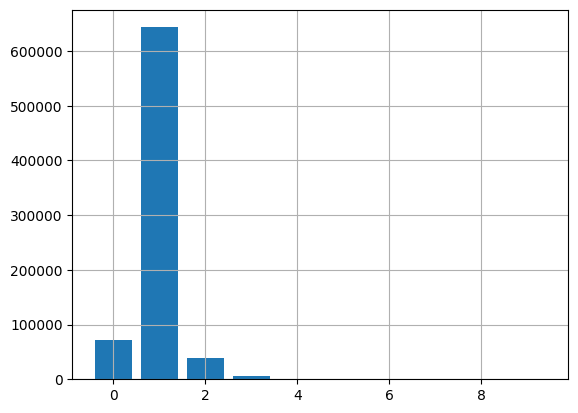

In [25]:
building_ownership[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(building_ownership[col]), 9+2)-0.5)
plt.axhline(building_ownership.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

In [27]:
len(building_ownership[building_ownership[col] == 1])/len(building_ownership)


0.8442631339997323

In [29]:
heatmap_df = building_ownership[["damage_grade", "count_families"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['count_families','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,count_families,damage_grade,values
0,0.0,Grade 1,11233
1,0.0,Grade 2,9787
2,0.0,Grade 3,13268
3,0.0,Grade 4,15842
4,0.0,Grade 5,21446
5,1.0,Grade 1,63154
6,1.0,Grade 2,72528
7,1.0,Grade 3,115467
8,1.0,Grade 4,156470
9,1.0,Grade 5,235790


In [31]:
heatmap_df = heatmap_df.pivot(index=['count_families'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                       
damage_grade    Grade 1  Grade 2   Grade 3   Grade 4   Grade 5
count_families                                                
0.0             11233.0   9787.0   13268.0   15842.0   21446.0
1.0             63154.0  72528.0  115467.0  156470.0  235790.0
2.0              3308.0   4034.0    6610.0    9968.0   15831.0
3.0               755.0    663.0     846.0    1268.0    2153.0
4.0               232.0    178.0     159.0     230.0     416.0
5.0                71.0     43.0      40.0      51.0      97.0
6.0                39.0     15.0      15.0      12.0      23.0
7.0                13.0      3.0       3.0       2.0       6.0
8.0                 8.0      2.0       3.0       NaN       2.0
9.0                 1.0      3.0       1.0       1.0       2.0
11.0                NaN      1.0       NaN       NaN       NaN

ValueError: Unknown format code 'd' for object of type 'float'

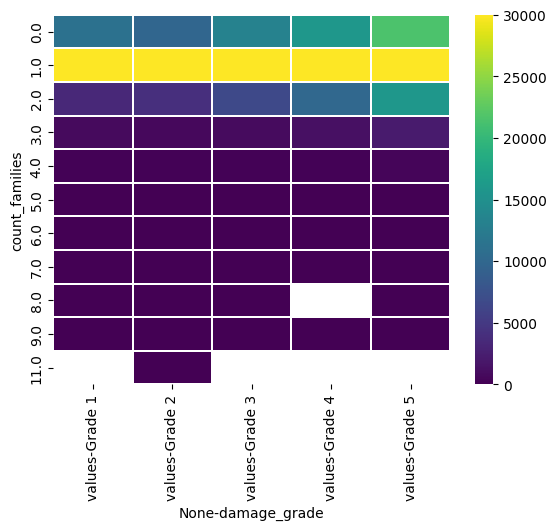

In [32]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Legal ownership status
## legal_ownership_status (type: categorical): legal ownership status of the land where building was built. 


In [17]:
col = "legal_ownership_status"
building_ownership[col].value_counts()

Private          731387
Public            19232
Institutional      7823
Other              3664
Name: legal_ownership_status, dtype: int64

In [18]:
heatmap_df = building_ownership[["damage_grade", "legal_ownership_status"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['legal_ownership_status','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,legal_ownership_status,damage_grade,values
0,Institutional,Grade 1,333
1,Institutional,Grade 2,464
2,Institutional,Grade 3,1081
3,Institutional,Grade 4,2196
4,Institutional,Grade 5,3749
5,Other,Grade 1,623
6,Other,Grade 2,492
7,Other,Grade 3,592
8,Other,Grade 4,611
9,Other,Grade 5,1346


In [20]:
heatmap_df = heatmap_df.pivot(index=['legal_ownership_status'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade           Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
legal_ownership_status                                        
Institutional              333     464    1081    2196    3749
Other                      623     492     592     611    1346
Private                  71941   82063  130851  178652  267868
Public                    5918    4238    3888    2385    2803

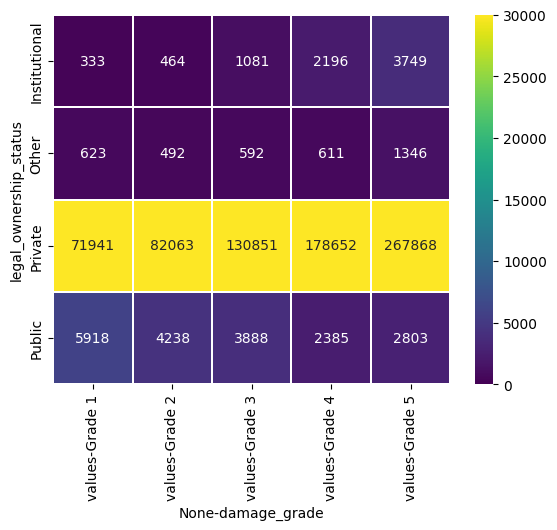

In [21]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');